# Chapter 3. Nerual Network

Perceptron can be used for making the complicated functions, but human should still set the proper weights.

## 3.1 From perceptron to neural network 

Perceptron can be expressed the following formulas  


$ y = 0 \ (w_1x_1 + w_2x_2 \leq \theta) \\ 
\ \ = 1 \  (w_1x_1 + w_2x_2 > \theta) $

$ y = h(b+w_1x_1+w_2x_2)  \\
h(x) = 0(x \leq 0) \  or\ 1(x > 0) $  #step function

Nerual network has input, hidden, and output layer.
Activation function decides if total sum of every input signal makes the activation. It is $h(x)$ in the above example.

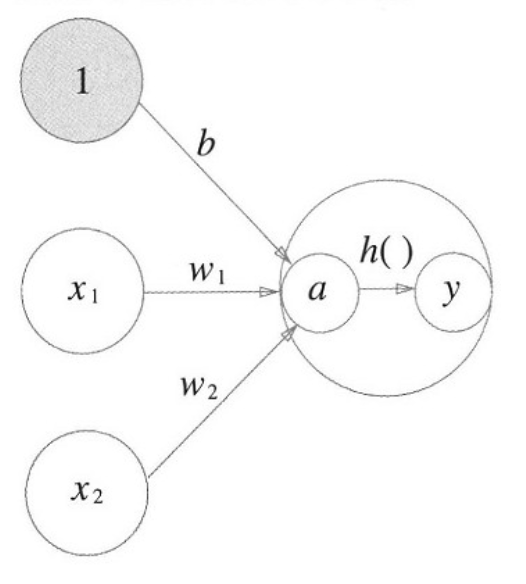

In [1]:
from IPython.display import Image
Image("Activation function's processing procedure.png")

## 3.2 Activation function

### Step function  
$ h(x) = 0(x \leq 0) \  or\ 1(x > 0) $  

In [4]:
def step_function(x): # only real number can be used as a input
    if x>0:
        return 1
    else:
        return 0

In [13]:
import numpy as np
def step_function_ary(x): # array can be used as a input 
    y = x > 0 # y = [False True True True] if x = np.array([0,1,2,3])
    return y.astype(np.int) #change bool type to int type #[0 1 1 1]

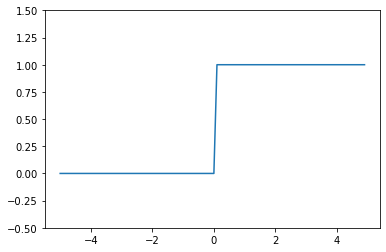

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function_ary(x)
plt.plot(x,y)
plt.ylim(-0.5, 1.5)
plt.show()

### Sigmoid function  
$ h(x) = \frac{1}{1+e^{-x}} $

In [17]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x)) # can return not only real number but also numpy array

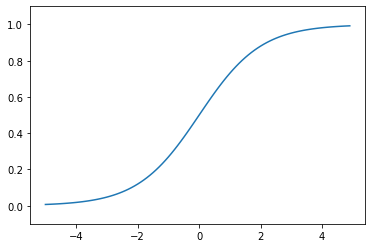

In [19]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

* Difference between sigmoid and step function  
       Sigmoid function is soft curve and the value is changed continously.  
       However, the value of step function is changed at the point x=0.
* Common features between sigmoid and step function
       The output is always between 0 and 1. If the input is important, they return big value. If not, they return small value.
       Both of them are nonlinear function.

Activation function in neural network should be nonlinear function. The reason is no matter how linear function have a lot of hidden layer, we can implement it by not using hidden layer.

$ i.e.\  if\ h(x) = cx\ and\ y(x) = h(h(h(x))),\ then\ y(x) = c^3x $ (it is same as $y(x) = ax\ where\  a = c^3$)


### ReLU function  
$h(x) = x (x>0)\  or\  0(x \leq 0)$

In [20]:
def relu(x):
    return np.maximum(0,x)

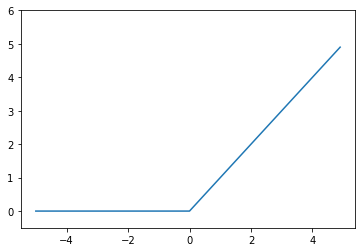

In [21]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0 ,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.5, 6.0)
plt.show()

## 3.3 calculation of multi-demensional array

### 3.3.1 Multi-dimensional array

In [25]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape) #return tuple
print(A.shape[0]) 

[1 2 3 4]
1
(4,)
4


In [28]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


### 3.3.2 Inner-product(dot-product) of matrices

In [29]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(np.dot(A,B))

[[19 22]
 [43 50]]


To multiply two matrices, the number of elements of corresponding dimension should be same.

### 3.3.3 Inner-product(dot-product) of matrices in neural network

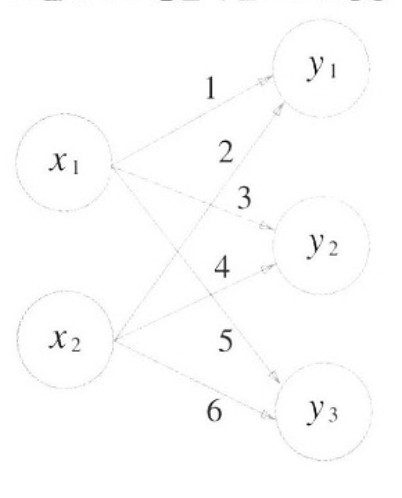

In [30]:
from IPython.display import Image
Image("innerproduct.png")

In [33]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print('X',X)
print('W',W)
print('Y',Y)

X [1 2]
W [[1 3 5]
 [2 4 6]]
Y [ 5 11 17]


## 3.4 Implementation 3-layer neural network

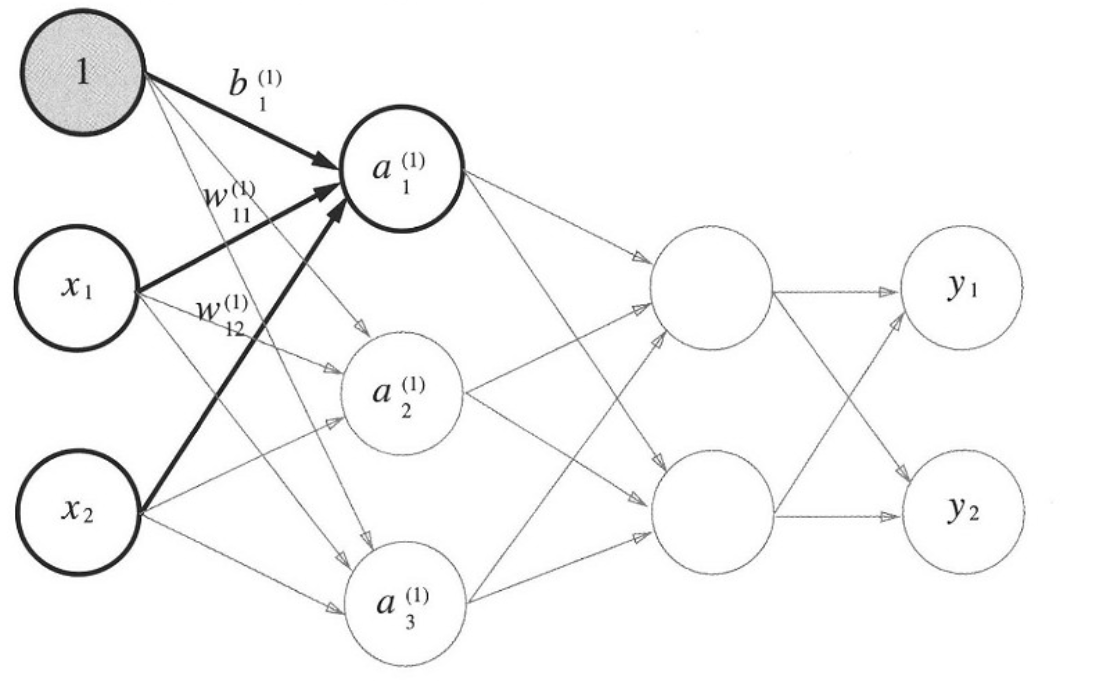

In [34]:
from IPython.display import Image
Image("3-layer neural network.png")

$ a_1^{(1)} = w_{11}^{(1)}x_1\ +\ w_{12}^{(1)}x_2\ +\ b_1^{(1)} $  

we can express same formula simply using inner-product of matrices  
$ A^{(1)}\ =\ XW^{(1)}\ +\ B^{(1)}\ 
where\ A^{(1)} = (a_1^{(1)}\ a_2^{(1)}\ a_3^{(1)}),\ 
X = (x_1\ x_2),\ 
B^{(1)} = (b_1^{(1)}\ b_2^{(1)}\ b_3^{(1)}),\ 
W^{(1)} = ( \begin{matrix} 
            w_{11}^{(1)}\ w_{21}^{(1)}\ w_{31}^{(1)}\\
            w_{12}^{(1)}\ w_{22}^{(1)}\ w_{32}^{(1)}\\
            \end{matrix})$